In [1]:
from tweet import *
from candidate import *
import pandas as pd
import numpy as np
import tweepy
import json
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
#TODO: Fill this in

consumer_key = "BeC8UJbqCHyX6pTWAvEvvIcGJ"
consumer_secret = "IwEzqplLUKar6MFZ7l828tLbEpxG3ObD49llOSPJ6Y6phKzVYT"
access_token = "727703646331240448-31ZFnJzKYfDcHh3HIgBhd1FfU3W7VaO"
access_token_secret = "GprFSIZ18ukkn9lZb7INfEn78miwkXzWpkzyJ6ocLAg6J"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
month_abbrs = dict((v,k) for k,v in enumerate(calendar.month_abbr))

most_recent_rankings = ['bennet',
                         'castro',
                         'booker',
                         'klobuchar',
                         'gabbard',
                         'yang',
                         'harris',
                         'buttigieg',
                         'warren',
                         'sanders',
                         'biden']

last_name_to_handle = {'bennet': 'MichaelBennet',
                         'castro': 'JulianCastro',
                         'booker': 'CoryBooker',
                         'klobuchar': 'amyklobuchar',
                         'gabbard': 'TulsiGabbard',
                         'yang': 'AndrewYang',
                         'harris': 'KamalaHarris',
                         'buttigieg': 'PeteButtigieg',
                         'warren': 'ewarren',
                         'sanders': 'BernieSanders',
                         'biden': 'JoeBiden'}

handle_to_last_name = {}
for i in last_name_to_handle:
    handle_to_last_name[i] = last_name_to_handle[i]

In [4]:
def get_tweet_time(time_str):
    global month_abbrs
    time_lst = time_str.split(" ")
    year = int(time_lst[-1])
    day = int(time_lst[2])
    month = month_abbrs[time_lst[1]]
    return datetime.date(year, month, day)    

In [8]:
# startDate =   datetime.datetime(2019, 6, 1, 0, 0, 0)
startDate =   datetime.datetime(2019, 11, 1, 0, 0, 0)
endDate = datetime.datetime(2019, 11, 2, 0, 0, 0)
tweets = {}
cand_handles = ['AndrewYang', 'ewarren', 'PeteButtigieg', 'BernieSanders', 
                'MichaelBennet', 'amyklobuchar', 'KamalaHarris', 'TulsiGabbard', 
                'JulianCastro', 'CoryBooker', 'JoeBiden']

for cand_name in cand_handles:
    print(cand_name)
    cand_tweets = []
    tweets[cand_name] = cand_tweets
    try:
        tmpTweets = api.user_timeline(cand_name, tweet_mode='extended')
#     except tweepy.TweepError:
#         time.sleep(60 * 15)
#         continue
    except StopIteration:
        break
    for t in tmpTweets:
        if t.created_at < endDate and t.created_at > startDate:
            cand_tweets.append(t)
    if len(cand_tweets) > 0:
        print(cand_tweets)
    try:
        while (tmpTweets[-1].created_at > startDate):
            tmpTweets = api.user_timeline(cand_name, max_id = tmpTweets[-1].id, tweet_mode='extended')
            for ti in tmpTweets:
                if ti.created_at < endDate and ti.created_at > startDate:
                    t = ti._json
                    tw_obj = Tweet(t['full_text'], get_tweet_time(t['created_at']), cand_name)
                    if 'media' in t['entities']:
                        tw_obj.contains_media()
                    if len(t['entities']['urls']) > 0:
                        tw_obj.contains_link()
                    if t['in_reply_to_screen_name'] and t['in_reply_to_screen_name'] != cand_name:
                        tw_obj.is_response()
                    cand_tweets.append(tw_obj)
#     except tweepy.TweepError:
#         time.sleep(60 * 15)
#         continue
    except:
        print(len(cand_tweets))
        print(len(tmpTweets))

AndrewYang
ewarren
PeteButtigieg
BernieSanders
MichaelBennet
amyklobuchar
KamalaHarris
TulsiGabbard
JulianCastro
CoryBooker
JoeBiden


In [ ]:

warren_tweets = tweets['ewarren']
print(len(tweets['ewarren']))
zzzzzzzzzzz = 0
for i in range(len(warren_tweets)):
    if (warren_tweets[i]._clean_text).count(" ") > 25:
        print(warren_tweets[i]._raw_text)
        print(warren_tweets[i].get_sentiment()[0])
        
        zzzzzzzzzzz += 1
print(zzzzzzzzzzz)

In [17]:
def avg_sentiment(cand):
    global tweets
    cand_t = tweets[cand]
    sent_sum = float(0)
    num_counted = float(0)
    for i in range(len(cand_t)):
#         if (cand_t[i]._clean_text).count(" ") > 30:
        if (cand_t[i]._clean_text).count(" ") > 15:
            sent_sum += cand_t[i].get_sentiment()[0]
            num_counted += 1
    return sent_sum/num_counted

cand_sentiments = {}
sentiment_nums = []
for i in tweets:
    sent = avg_sentiment(i)
    cand_sentiments[i] = sent
    sentiment_nums.append(sent)

In [18]:
cand_sentiments

sentiment_nums

[0.08645833333333333,
 0.09637659665437444,
 0.26666666666666666,
 0.04106240981240981,
 -0.021861471861471866,
 0.3551488095238095,
 0.19049938157081017,
 0.3181481481481481,
 0.15763888888888888,
 0.12083333333333335,
 0.2638888888888889]

[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


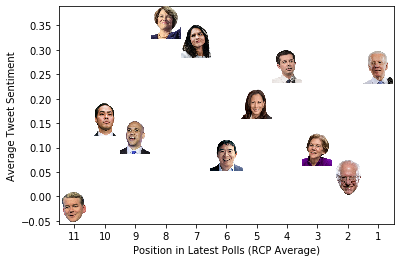

In [24]:
def getImage(path):
    if path == 'images/sanders.png':
        return OffsetImage(plt.imread(path), zoom = 0.03, interpolation='gaussian')
    elif path == 'images/bennet.png':
        return OffsetImage(plt.imread(path), zoom = 0.08, interpolation='gaussian')
    else:
        return OffsetImage(plt.imread(path), zoom = 0.1, interpolation='gaussian')

paths = ['images/bennet.png',
        'images/biden.png',
        'images/booker.png',
        'images/buttigieg.png',
        'images/castro.png',
        'images/gabbard.png',
        'images/harris.png',
        'images/klobuchar.png',
        'images/sanders.png',
        'images/warren.png',
        'images/yang.png']

x = [i+1 for i in range(len(paths))]
y = sentiment_nums
# x = [0,1,2,3,4]
# y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y, color = "white")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))


# for x0, y0, path in zip(x, y,paths):
for i in range(len(paths)):
    candidate_name = most_recent_rankings[i]
    path_name = "images/" + candidate_name + ".png"
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False) # , box_alignment=(0.3,0.3))
    ab = AnnotationBbox(getImage(path_name), (x[i], 
                            cand_sentiments[last_name_to_handle[candidate_name]]), frameon=False) # , box_alignment=(0.3,0.3))
    ax.add_artist(ab)
    
plt.xlabel("Position in Latest Polls (RCP Average)")
plt.ylabel("Average Tweet Sentiment")
plt.title("Average Tweet Sentiment vs. Position in Polls")

print(np.arange(len(paths), 0, -1.0))

plt.savefig('my_figure.pdf', bbox_inches='tight', dpi=400)